# Final Gantt on the Status of High Energy Astrophysics
Prelimiary plots as well as learning to make Gantt charts and searching the correct data (i.e. getting to know all $\gamma$-ray and X-ray mission in the last 30 years) can be found in another notebook named `GanttObservatories.ipynb`.

Plot saved to observatory_timeline.png


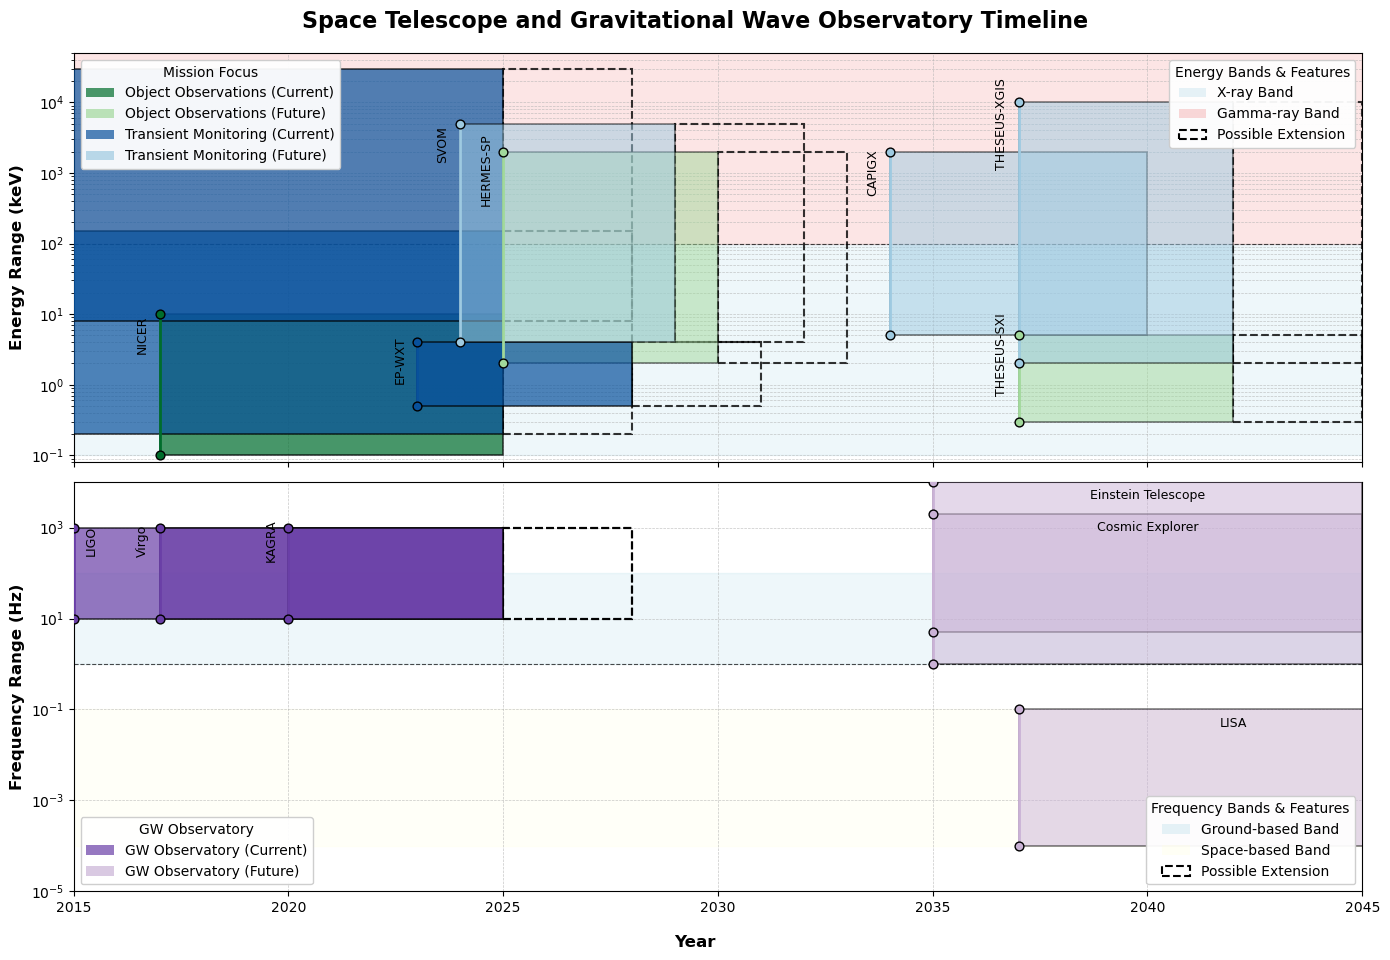

In [60]:
"""
Module: mission_timeline_plotter
Creates a detailed timeline of space telescope missions and gravitational wave observatories.
"""

from dataclasses import dataclass
from typing import Tuple, Literal, Optional, List
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Patch, Rectangle
from matplotlib.text import Annotation
import numpy as np

# --- Data Definitions ---
MissionNature = Literal['object', 'object_future', 'transient', 'transient_future', 'gw', 'gw_future']
ExtensionStatus = Literal['y', 'n']

@dataclass
class Observatory:
    """Data class representing a space telescope or gravitational wave observatory."""
    name: str
    energy_range_kev: Tuple[float, float]  # For GW observatories, this represents frequency range in Hz
    mission_range_years: Tuple[int, int]
    has_extension: ExtensionStatus
    nature: MissionNature  # 'object', 'transient', 'object_future', 'transient_future', 'gw', 'gw_future'
    source: str
    label_offset: Optional[Tuple[float, float]] = None  # For manual label adjustment
    is_gw: bool = False  # Flag to identify gravitational wave observatories

# --- Mission Data ---
telescopes = [
    # Object-focused, current
    Observatory('NICER', (0.1, 10), (2017, 2025), 'n', 'object', 'NICER website'),
    # Object-focused, future
    Observatory('THESEUS-SXI', (0.3, 5), (2037, 2042), 'y', 'object_future', 'source'),
    Observatory('HERMES-SP', (2, 2000), (2025, 2030), 'y', 'object_future', 'Evangelista et al.', (0, 100)),
    # Transient monitoring, current
    Observatory('Swift', (0.2, 150), (2004, 2025), 'y', 'transient', 'source'),
    Observatory('FERMI', (8, 30000), (2008, 2025), 'y', 'transient', 'source'),
    Observatory('EP-WXT', (0.5, 4), (2023, 2028), 'y', 'transient', 'source'),
    # Transient monitoring, future
    Observatory('CAPIGX', (5, 2000), (2034, 2040), 'n', 'transient_future', 'alcaide-núñez 2025 inprep'),
    Observatory('SVOM', (4, 5000), (2024, 2029), 'y', 'transient_future', 'source'),
    Observatory('THESEUS-XGIS', (2, 10000), (2037, 2042), 'y', 'transient_future', 'source'),
]

# Gravitational Wave Observatories
gw_observatories = [
    # Current ground-based observatories (all transient monitoring)
    Observatory('LIGO', (10, 1000), (2015, 2025), 'y', 'gw', 'LIGO Collaboration', is_gw=True),
    Observatory('Virgo', (10, 1000), (2017, 2025), 'y', 'gw', 'Virgo Collaboration', is_gw=True),
    Observatory('KAGRA', (10, 1000), (2020, 2025), 'y', 'gw', 'KAGRA Collaboration', is_gw=True),
    # Future ground-based
    Observatory('Cosmic Explorer', (5, 2000), (2035, 2045), 'n', 'gw_future', 'Proposed', is_gw=True),
    Observatory('Einstein Telescope', (1, 10000), (2035, 2045), 'n', 'gw_future', 'Proposed', is_gw=True),
    # Space-based (transient monitoring)
    Observatory('LISA', (0.0001, 0.1), (2037, 2047), 'y', 'gw_future', 'ESA/NASA', is_gw=True),
]

# Combine all observatories
all_observatories = telescopes + gw_observatories

# --- Configuration ---
COLORS = {
    "object": "#006d2c",            # deep green (object-focused, current)
    "object_future": "#a1d99b",     # pastel green (object-focused, future)
    "transient": "#08519c",         # deep blue (transient, current)
    "transient_future": "#9ecae1",  # pastel blue (transient, future)
    "gw": "#6a3fa7",                # purple for GW (current)
    "gw_future": "#cab2d6",         # pastel purple for GW (future)
}

DISPLAY_NAMES = {
    "object": "Object Observations (Current)",
    "object_future": "Object Observations (Future)",
    "transient": "Transient Monitoring (Current)",
    "transient_future": "Transient Monitoring (Future)",
    "gw": "GW Observatory (Current)",
    "gw_future": "GW Observatory (Future)",
}

X_LIMITS = (2015, 2045)
Y_LIMITS_EM = (0.08, 50000)
Y_LIMITS_GW = (0.00001, 10000)
EXTENSION_LENGTH_YEARS = 3

# --- Plotting Function ---
def create_observatory_timeline_plot(observatories: List[Observatory], 
                                    output_path: Optional[str] = None,
                                    dpi: int = 300) -> plt.Figure:
    fig, (ax_em, ax_gw) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    em_observatories = [obs for obs in observatories if not obs.is_gw]
    gw_observatories = [obs for obs in observatories if obs.is_gw]
    
    _plot_em_observatories(ax_em, em_observatories)
    _plot_gw_observatories(ax_gw, gw_observatories)
    
    fig.supxlabel("Year", fontsize=12, fontweight='bold')
    fig.suptitle("Space Telescope and Gravitational Wave Observatory Timeline", 
                fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    if output_path:
        fig.savefig(output_path, dpi=dpi, bbox_inches='tight')
        print(f"Plot saved to {output_path}")
    return fig

def _plot_em_observatories(ax: plt.Axes, observatories: List[Observatory]) -> None:
    ax.axhspan(ymin=0.1, ymax=100, color='lightblue', alpha=0.2)
    ax.axhspan(ymin=100, ymax=10**5, color='lightcoral', alpha=0.2)
    ax.axhline(y=100, color='black', linestyle='--', alpha=0.7, linewidth=0.8)
    for obs in observatories:
        _plot_mission(ax, obs, Y_LIMITS_EM)
    ax.set_ylabel("Energy Range (keV)", fontsize=12, fontweight='bold')
    ax.set_yscale("log")
    ax.set_ylim(Y_LIMITS_EM)
    ax.set_xlim(X_LIMITS)
    _create_em_legends(ax)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)

def _plot_gw_observatories(ax: plt.Axes, observatories: List[Observatory]) -> None:
    ax.axhspan(ymin=1, ymax=100, color='lightblue', alpha=0.2)
    ax.axhspan(ymin=0.0001, ymax=0.1, color='lightyellow', alpha=0.2)
    ax.axhline(y=1, color='black', linestyle='--', alpha=0.7, linewidth=0.8)
    for obs in observatories:
        _plot_mission(ax, obs, Y_LIMITS_GW)
    ax.set_ylabel("Frequency Range (Hz)", fontsize=12, fontweight='bold')
    ax.set_yscale("log")
    ax.set_ylim(Y_LIMITS_GW)
    ax.set_xlim(X_LIMITS)
    _create_gw_legends(ax)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)

def _plot_mission(ax: plt.Axes, mission: Observatory, y_limits: Tuple[float, float]) -> None:
    color = COLORS[mission.nature]
    launch, end_mission = mission.mission_range_years
    low_range, high_range = mission.energy_range_kev
    width = end_mission - launch
    height = high_range - low_range

    rect = Rectangle((launch, low_range), width, height,
                     facecolor=color, alpha=0.7 if "future" not in mission.nature else 0.5,
                     edgecolor="black", linewidth=1.2, zorder=3)
    ax.add_patch(rect)

    ax.plot([launch, launch], [low_range, high_range], color=color, linestyle='-', linewidth=2, zorder=4)
    ax.scatter([launch], [low_range], color=color, s=40, edgecolor='black', zorder=5)
    ax.scatter([launch], [high_range], color=color, s=40, edgecolor='black', zorder=5)

    if mission.has_extension == 'y':
        ext_rect = Rectangle((end_mission, low_range), EXTENSION_LENGTH_YEARS, height,
                             facecolor='none', edgecolor='black', linestyle='--',
                             linewidth=1.5, alpha=0.8, zorder=2)
        ax.add_patch(ext_rect)

    # Annotation placement as before
    special_labels = {"Cosmic Explorer", "Einstein Telescope", "LISA", "CoEx", "ET"}
    if any(lbl in mission.name for lbl in special_labels):
        label_x = launch + width / 2
        label_y = low_range + height / 2
        rotation = 0
    else:
        label_x = launch - 0.4 if launch > X_LIMITS[0] + 1 else launch + 0.4
        label_y = low_range + height / 2
        rotation = 90

    if mission.label_offset:
        label_x += mission.label_offset[0]
        label_y += mission.label_offset[1]

    if X_LIMITS[0] < label_x < X_LIMITS[1] and y_limits[0] < label_y < y_limits[1]:
        ann = Annotation(mission.name, (label_x, label_y),
                         xytext=(0, 0), textcoords='offset points',
                         ha='center', va='center', fontsize=9,
                         color='black', rotation=rotation, zorder=6)
        ax.add_artist(ann)

def _create_em_legends(ax: plt.Axes) -> None:
    mission_elements = [
        Patch(facecolor=color, alpha=0.7, label=DISPLAY_NAMES[nature])
        for nature, color in COLORS.items() if not nature.startswith('gw')
    ]
    mission_legend = ax.legend(handles=mission_elements, loc='upper left', 
                              title="Mission Focus", title_fontsize=10,
                              framealpha=0.95)
    ax.add_artist(mission_legend)
    band_elements = [
        Patch(facecolor='lightblue', alpha=0.3, label='X-ray Band'),
        Patch(facecolor='lightcoral', alpha=0.3, label='Gamma-ray Band'),
        Patch(facecolor='none', edgecolor='black', linestyle='--', 
              linewidth=1.5, label='Possible Extension')
    ]
    ax.legend(handles=band_elements, loc='upper right', 
             title="Energy Bands & Features", title_fontsize=10,
             framealpha=0.95)

def _create_gw_legends(ax: plt.Axes) -> None:
    mission_elements = [
        Patch(facecolor=COLORS['gw'], alpha=0.7, label=DISPLAY_NAMES['gw']),
        Patch(facecolor=COLORS['gw_future'], alpha=0.7, label=DISPLAY_NAMES['gw_future'])
    ]
    mission_legend = ax.legend(handles=mission_elements, loc='lower left',
                              title="GW Observatory", title_fontsize=10,
                              framealpha=0.95)
    ax.add_artist(mission_legend)
    band_elements = [
        Patch(facecolor='lightblue', alpha=0.3, label='Ground-based Band'),
        Patch(facecolor='lightyellow', alpha=0.3, label='Space-based Band'),
        Patch(facecolor='none', edgecolor='black', linestyle='--',
              linewidth=1.5, label='Possible Extension')
    ]
    ax.legend(handles=band_elements, loc='lower right',
             title="Frequency Bands & Features", title_fontsize=10,
             framealpha=0.95)

if __name__ == "__main__":
    fig = create_observatory_timeline_plot(all_observatories, output_path='observatory_timeline.png')
    plt.show()

In [54]:
telescopes = [
    Observatory('Swift', (0.2, 150), (2004, 2025), 'y', 'current_xray', 'source'),
    #Observatory('Swift-BAT', (15, 150), (2004, 2025), 'y', 'current_xray', 'source'),
    #Observatory('Swift-XRT', (0.2, 10), (2004, 2025), 'y', 'current_xray', 'source'),
    Observatory('SVOM', (4, 5000), (2024, 2029), 'y', 'current_xray', 'source'),
    #Observatory('SVOM-ECLAIRs', (4, 120), (2024, 2029), 'y', 'current_xray', 'source'),
    #Observatory('SVOM-GRM', (50, 5000), (2024, 2029), 'y', 'current_xray', 'source'),
    Observatory('EP-WXT', (0.5, 4), (2023, 2028), 'y', 'current_xray', 'source'),
    Observatory('NICER', (0.1, 10), (2017, 2025), 'n', 'current_xray', 'Description NICER website'),

    Observatory('FERMI', (8, 30000), (2008, 2025), 'y', 'current_gamma', 'source'),
    #Observatory('FERMI-Nal', (8, 1000), (2008, 2025), 'y', 'current_gamma', 'source'),
    #Observatory('FERMI-BGO', (150, 30000), (2008, 2025), 'y', 'current_gamma', 'source'),
    
    Observatory('THESEUS-SXI', (0.3, 5), (2037, 2042), 'y', 'future_xray', 'source'),
    Observatory('HERMES-SP', (2, 2000), (2025, 2030), 'y', 'future_xray', 'Evangelista et al.', (0, 100)),
    
    Observatory('THESEUS-XGIS', (2, 10000), (2037, 2042), 'y', 'future_gamma', 'source'),

    Observatory('CAPIGX', (5, 2000), (2034, 2040), 'n', 'capigx', 'alcaide-núñez 2025 inprep'),
    #Observatory('CAPIGX-SOFT', (5, 150), (2034, 2040), 'n', 'capigx', 'alcaide-núñez 2025 inprep'),
    #Observatory('CAPIGX-HARD', (150, 2000), (2034, 2040), 'n', 'capigx', 'alcaide-núñez 2025 inprep'),
]

# Gravitational Wave Observatories
gw_observatories = [
    # Current ground-based observatories (converted from Hz to "pseudo-keV" for plotting)
    Observatory('LIGO', (10, 1000), (2015, 2025), 'y', 'gw_ground', 'LIGO Collaboration', is_gw=True),
    Observatory('Virgo', (10, 1000), (2017, 2025), 'y', 'gw_ground', 'Virgo Collaboration', is_gw=True),
    Observatory('KAGRA', (10, 1000), (2020, 2025), 'y', 'gw_ground', 'KAGRA Collaboration', is_gw=True),
    
    # Future ground-based observatories
    Observatory('Cosmic Explorer', (5, 2000), (2035, 2045), 'n', 'gw_ground', 'Proposed', is_gw=True),
    Observatory('Einstein Telescope', (1, 10000), (2035, 2045), 'n', 'gw_ground', 'Proposed', is_gw=True),
    
    # Space-based observatories
    Observatory('LISA', (0.0001, 0.1), (2037, 2047), 'y', 'gw_space', 'ESA/NASA', is_gw=True),
]

# Combine all observatories
all_observatories = telescopes + gw_observatories

# --- Configuration ---
COLORS = {
    "current_xray": "royalblue",
    "future_xray": "cornflowerblue",
    "current_gamma": "darkred",
    "future_gamma": "firebrick",
    "capigx": "goldenrod",
    "gw_ground": "purple",
    "gw_space": "darkviolet"
}

DISPLAY_NAMES = {
    "current_xray": "Current X-ray",
    "future_xray": "Future X-ray",
    "current_gamma": "Current Gamma-ray", 
    "future_gamma": "Future Gamma-ray",
    "capigx": "CAPIGX",
    "gw_ground": "GW Ground-based",
    "gw_space": "GW Space-based"
}